<a href="https://colab.research.google.com/github/Luseat/clustering_mall_customer/blob/main/Clustering_Mall_Cutomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **Data Loading**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Luseat/clustering_mall_customer/refs/heads/main/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. **CustomerID:** Ini berisi ID unik untuk setiap pelanggan, bertipe data int64.
2. **Gender:** Ini menunjukkan jenis kelamin pelanggan, bertipe data object (kategori).
3. **Age:** Ini menampilkan usia pelanggan dalam tahun, bertipe data int64.
4. **Annual Income (k$):** Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data int64.
5. **Spending Score (1-100):** Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data int64.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Menhitung distribusi dan menampilkan pie cart

# **Exploratory Data Analysis**

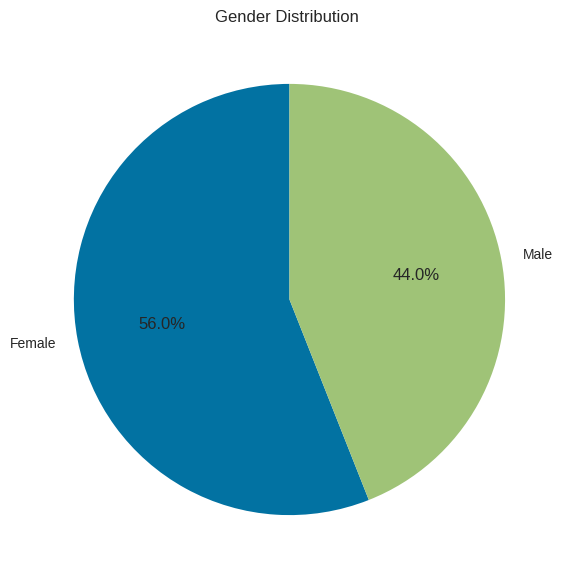

In [5]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle = 90)
plt.title('Gender Distribution ')
plt.show()

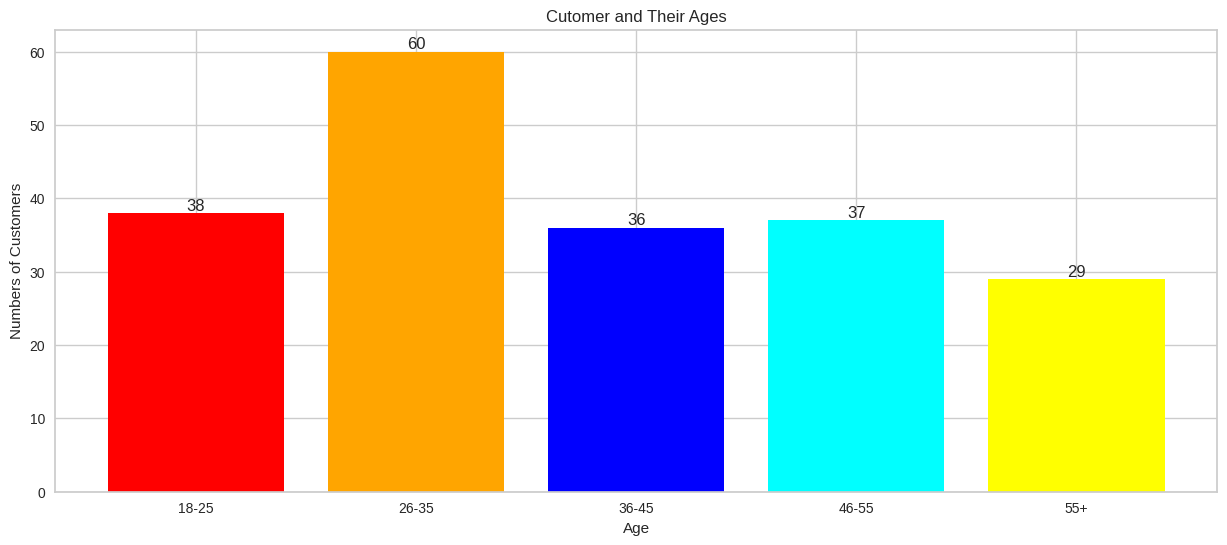

In [6]:
# # Mengelompokkan usia ke dalam kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above =  df.Age[df.Age >= 56]


# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15,6))
plt.bar(x, y, color = ['red', 'orange', 'blue', 'cyan', 'yellow'])
plt.title("Cutomer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Numbers of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range (len(x)):
    plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')
plt.show()

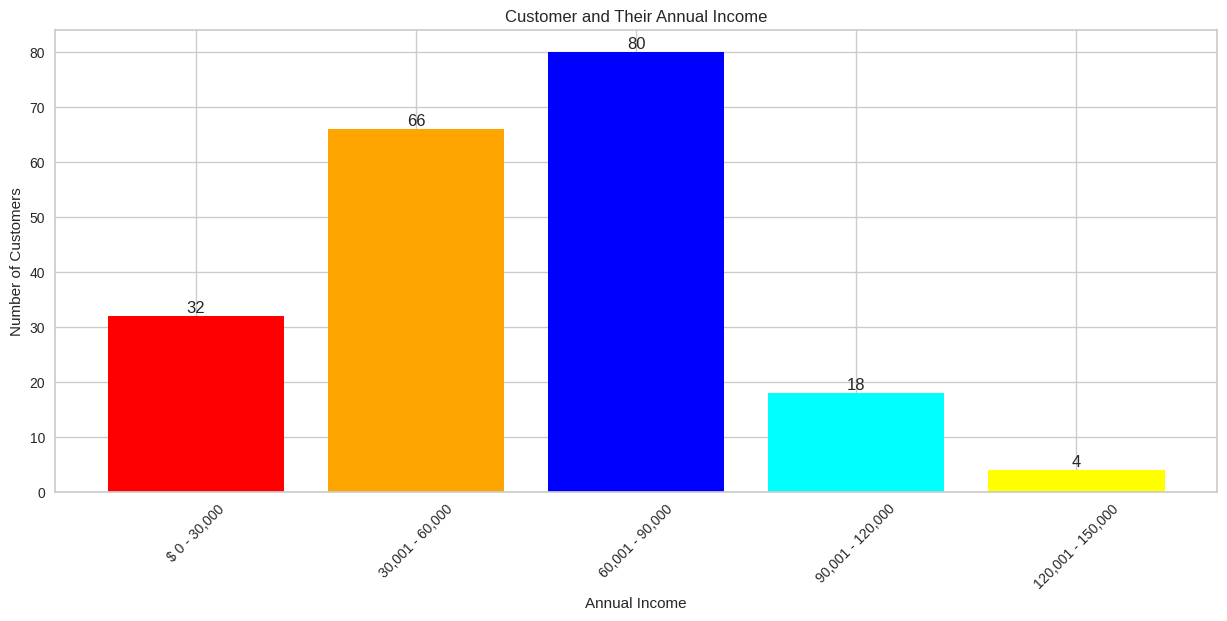

In [7]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]


# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "30,001 - 60,000", "60,001 - 90,000", "90,001 - 120,000", "120,001 - 150,000" ]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color = ['red', 'orange', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 45) # Memutar label sumbu x agar lebih mudah dibaca

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range (len(aix)):
  plt.text(i, aiy[i], aiy[i], ha = 'center', va = 'bottom')

plt.show()

# **Data Spliting**

kita mengambil dua kolom penting dari dataset: Annual Income (k$) dan Spending Score (1-100). Data dari kedua kolom ini disimpan dalam array X untuk analisis lebih lanjut. Setelah itu, kita menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai, yaitu Annual Income (k$) dan Spending Score (1-100). Ini memungkinkan kita untuk melihat serta memeriksa nilai-nilai pendapatan tahunan dan skor pengeluaran pelanggan dengan cara yang lebih terstruktur serta mudah dibaca.

In [8]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Untuk menentukan jumlah cluster yang optimal, kita menggunakan metode elbow dengan model KMeans. Pertama, kita menginisialisasi model KMeans tanpa menetapkan jumlah cluster awal. Selanjutnya, kita menggunakan KElbowVisualizer untuk mengevaluasi berbagai jumlah cluster dari 1 hingga 10.

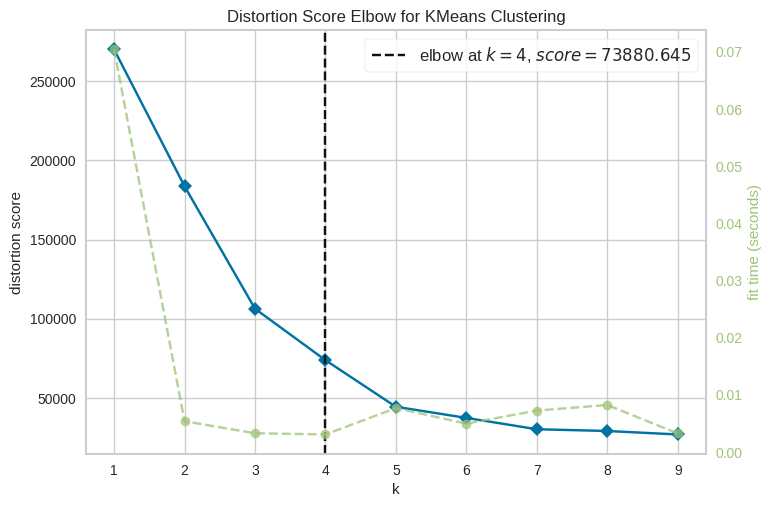

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
visualizer.show()

# **Cluster Modeling (K-Means Clustering)**

Dalam kode ini, kita melakukan analisis karakteristik cluster setelah melatih model KMeans dengan jumlah cluster yang telah ditetapkan, yaitu 4. Pertama, kita menginisialisasi model KMeans dengan parameter n_clusters=4 dan random_state=0 untuk memastikan hasil yang konsisten. Setelah melatih model dengan data X, kita memperoleh label cluster untuk setiap titik data.

berati untuk labelnya sendiri,ada dibagian labels yang dimana itu berdasarkan setiap titik warna id.

In [16]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)

labels = kmeans.labels_ # Mendapatkan label cluster
k = 4 # Mendapatkan jumlah cluster(K)

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
  print("Analisis Karakteristik Setiap Cluster:")
  for cluster_id in range(k):
    cluster_data = X[labels == cluster_id] # Mengambil data untuk cluster saat ini

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_income = cluster_data[:, 0].mean() # Rata-rata Annual Income
    mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score


    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata Annual Income: {mean_income:.2f}")
    print(f"Rata-rata Spending Score: {mean_spending:.2f}")


# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income: 48.26
Rata-rata Spending Score: 56.48

Cluster 2:
Rata-rata Annual Income: 86.54
Rata-rata Spending Score: 82.13

Cluster 3:
Rata-rata Annual Income: 87.00
Rata-rata Spending Score: 18.63

Cluster 4:
Rata-rata Annual Income: 26.30
Rata-rata Spending Score: 20.91


kita melakukan visualisasi hasil clustering yang telah dilakukan dengan model KMeans serta menampilkan posisi centroid dari setiap cluster. Pertama, kita menentukan posisi centroid dengan menggunakan atribut cluster_centers_ dari model KMeans.

Visualisasi dimulai dengan plot scatter untuk menampilkan data pelanggan yang telah dikelompokkan ke dalam cluster dengan warna berbeda pada setiap cluster berdasarkan pemberian label. Centroid dari setiap cluster digambarkan dengan marker 'X' berwarna merah dan ukuran yang lebih besar. Label ditambahkan pada setiap centroid untuk menandai posisinya.

Selain itu, kita menambahkan judul serta label pada sumbu X dan Y untuk memberikan konteks pada plot yang menunjukkan distribusi pendapatan tahunan serta skor belanja pelanggan dalam setiap cluster. Setelah visualisasi, nilai centroid untuk setiap cluster ditampilkan. Ini menunjukkan pendapatan tahunan dan skor belanja rata-rata yang mewakili pusat dari masing-masing cluster

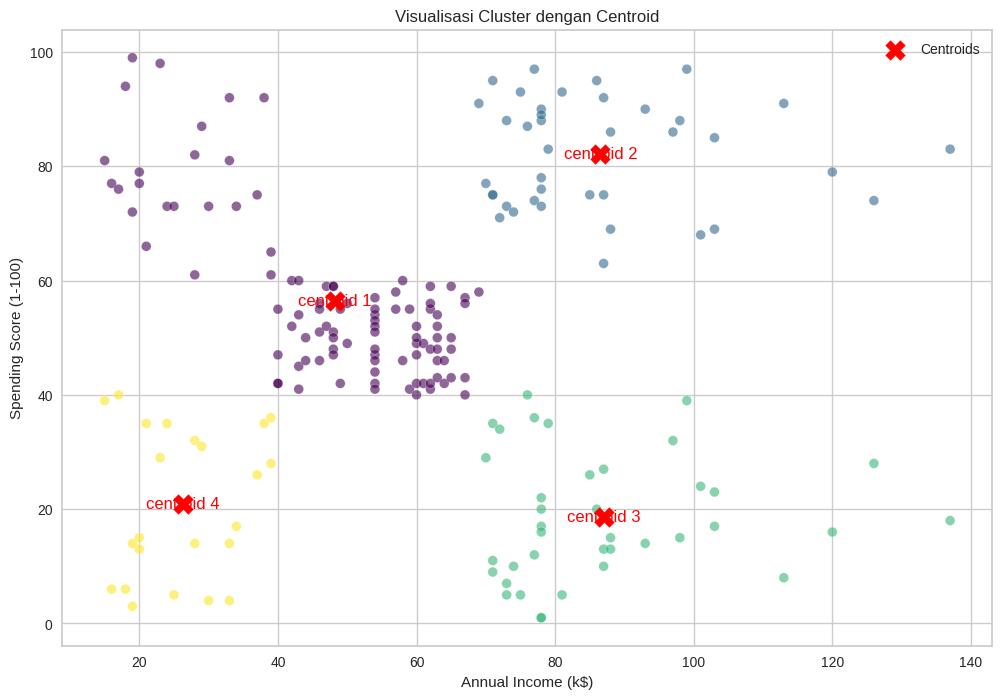

Nilai Centroid:
centroid 1: Annual Income = 48.26, Spending Score = 56.48
centroid 2: Annual Income = 86.54, Spending Score = 82.13
centroid 3: Annual Income = 87.00, Spending Score = 18.63
centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [21]:
import matplotlib.pyplot as plt

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red',s=200, marker='X', label='Centroids')


# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
  plt.text(centroid[0], centroid[1], f'centroid { i+1}', color='red', fontsize=12, ha='center', va='center')
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroid:")
for i, centroid in enumerate(centroids):
  print(f"centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

1. **Centroid 1:** pendapatan tahunan $48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.

2. **Centroid 2:** pendapatan tahunan $86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.

3. **Centroid 3:** pendapatan tahunan $87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.

4. **Centroid 4:** pendapatan tahunan $26,300 serta skor belanja 20.91 menunjukkan pelanggan dengan pendapatan dan belanja rendah.